In [1]:
import pydot, sklearn.datasets
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import numpy as np
import itertools as it
import seaborn as sns
import pandas as pd
%pylab --no-import-all inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('tweets.csv')

In [13]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [10]:
tweet_dictionary=df.text

In [7]:
#Create dictionary of all tweets
tweet_dictionary = pd.DataFrame()
for i in range(0,len(df)):
        tweet_dictionary[i] = df.text[i]
print(tweet_dictionary[1])

Series([], Name: 1, dtype: object)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = tweet_dictionary
#corpus = ["This is very strange",
  #        "This is very nice"]
vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus)
idf = vectorizer.idf_
print(dict(zip(vectorizer.get_feature_names(), idf)))

{'00': 7.883530890091272, '000': 7.157593886708336, '000114': 9.898433910633537, '000419': 9.898433910633537, '000ft': 9.898433910633537, '000lbs': 9.898433910633537, '0011': 9.898433910633537, '0016': 9.898433910633537, '00a': 9.898433910633537, '00am': 9.492968802525372, '00p': 9.898433910633537, '00pm': 8.799821621965428, '01': 9.898433910633537, '0162389030167': 9.898433910633537, '0162424965446': 9.898433910633537, '0162431184663': 9.898433910633537, '0167560070877': 9.898433910633537, '0185': 9.898433910633537, '01ldxn3qqq': 9.898433910633537, '01pm': 9.898433910633537, '02': 8.64567094213817, '0200': 9.898433910633537, '03': 8.799821621965428, '0316': 9.898433910633537, '0372389047497': 9.898433910633537, '04': 9.898433910633537, '0400': 9.898433910633537, '04sdytt7zd': 9.898433910633537, '05': 8.512139549513646, '0510': 9.492968802525372, '0530': 9.898433910633537, '05am': 8.982143178759383, '05pm': 8.982143178759383, '06': 9.898433910633537, '0600': 9.492968802525372, '0638': 

In [3]:
def draw_scatter(data, labels, x_feature, y_feature):
    plt.scatter(data[:, x_feature], data[:, y_feature], c=labels, alpha=0.5, s=100)
    plt.xlabel(iris.feature_names[x_feature]), plt.ylabel(iris.feature_names[y_feature])
    plt.show()

In [5]:
# Loading example dataset: IRIS dataset
iris = sklearn.datasets.load_iris()
print(iris)

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

(0, 'sepal length (cm)') (1, 'sepal width (cm)')


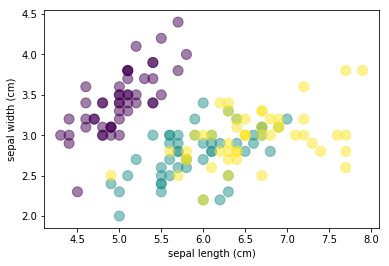

(0, 'sepal length (cm)') (2, 'petal length (cm)')


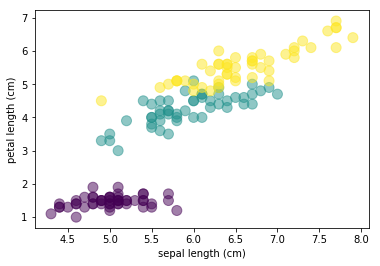

(0, 'sepal length (cm)') (3, 'petal width (cm)')


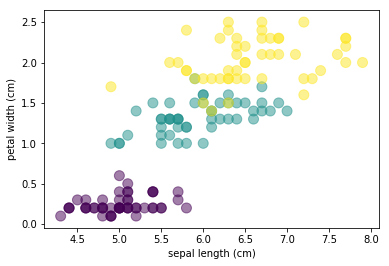

(1, 'sepal width (cm)') (2, 'petal length (cm)')


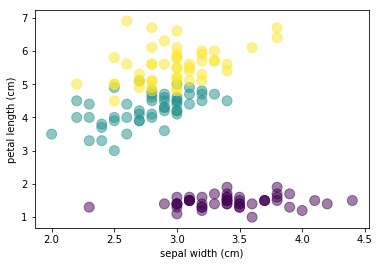

(1, 'sepal width (cm)') (3, 'petal width (cm)')


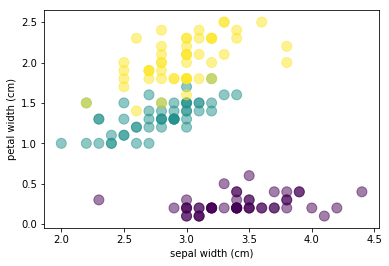

(2, 'petal length (cm)') (3, 'petal width (cm)')


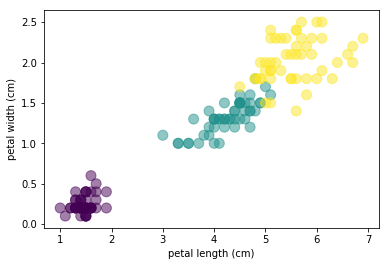

In [6]:
for i, j in it.combinations(enumerate(iris.feature_names), 2):
    print(i,j)
    draw_scatter(iris.data, iris.target, i[0], j[0])

In [7]:
print(iris.feature_names)
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Performance Expectations

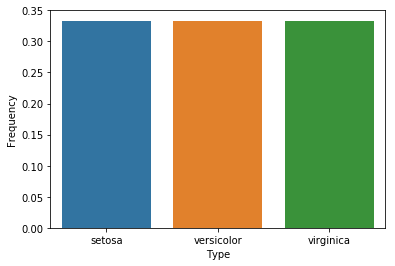

In [8]:
tab = pd.DataFrame({
    'Type': ['setosa', 'versicolor', 'virginica'],
    'Frequency': [len([i for i in iris.target if i == 0]) / len(iris.target), 
                  len([i for i in iris.target if i == 1]) / len(iris.target), 
                  len([i for i in iris.target if i == 2]) / len(iris.target)]
})
sns.barplot(x='Type', y='Frequency', data=tab)

In [10]:
# Instantiate Decision Tree classifier
from sklearn import tree, cross_validation, neighbors
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [33]:
# Instantiate K-NN Classifier
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

In [11]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
# K-fold construction
folds = 5
kf = cross_validation.KFold(len(iris.data), n_folds=folds, shuffle=True) 

# K-fold cross validation and performance evaluation
foldid = 0
totacc = 0.
ytlog = []
yplog = []
for train_index, test_index in kf:
    foldid += 1
    print("Starting Fold %d" % foldid)
    print("\tTRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    totacc += acc
    ytlog += list(y_test)
    yplog += list(y_pred)
    
    print('\tPrediction: ', y_pred)
    print('\tCorrect:    ', y_test)
    print('\tAccuracy:', acc)
#     print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("Average Accuracy: %0.3f" % (totacc / folds,))
print(classification_report(ytlog, yplog, target_names=iris.target_names))


Starting Fold 1
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2]
	Correct:     [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
	Accuracy: 0.966666666667
Starting Fold 2
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 2 2 2]
	Correct:     [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
	Accuracy: 0.966666666667
Starting Fold 3
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2]
	Correct:     [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
	Accuracy: 0.933333333333
Starting Fold 4
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2]
	Correct:     [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
	Accuracy: 0.966666666667
Starting Fold 5
	TRAIN: 120 TEST: 30
	Prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
	Correct:     [0 0 0 0 0 0 

Show the decision tree.

In [14]:
with open("iris.dot", 'w') as f: 
    f = tree.export_graphviz(clf, out_file=f,
        feature_names=iris.feature_names,  
        class_names=iris.target_names)
# Now, we just need to run `dot -Tpng iris.dot -o tree.png` to convert it to PNG

In [5]:
# Sources:
# http://www.astro.washington.edu/users/vanderplas/Astr599/notebooks/18_IntermediateSklearn
# http://matplotlib.org/examples/pylab_examples/scatter_star_poly.html
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
# http://scikit-learn.org/stable/auto_examples/plot_confusion_matrix.html#example-plot-confusion-matrix-py
# http://scikit-learn.org/stable/modules/cross_validation.html
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html
# http://scikit-learn.org/stable/modules/tree.html
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html